In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from numpy.random import rand

def import_csv(csvfile):
    """
    Imports the CSV file as an array of lines
    
    :param csvfile: The path of the CSV file
    :return lines: The lines of the CSV file 
    """
    lines = []
    with open(log_path) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

    return lines

In [23]:
data_path = './data/'
img_path = data_path + 'IMG/'
log_path = data_path + 'driving_log.csv'

# Store the lines of the CSV file in an array
lines = import_csv(log_path)

In [24]:
# Test to make sure we read that properly
print(lines[0])
print(len(lines))

['/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/center_2017_05_28_10_49_49_092.jpg', '/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/left_2017_05_28_10_49_49_092.jpg', '/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/right_2017_05_28_10_49_49_092.jpg', '-0.04981203', '0', '0', '5.2513']
70279


In [25]:
# Transform to a relative path to the images
for line in lines:
    line[0] = line[0].split('/')[-1]
    line[1] = line[1].split('/')[-1]
    line[2] = line[2].split('/')[-1]
    
# Test
print(lines[0])

['center_2017_05_28_10_49_49_092.jpg', 'left_2017_05_28_10_49_49_092.jpg', 'right_2017_05_28_10_49_49_092.jpg', '-0.04981203', '0', '0', '5.2513']


In [29]:
import cv2
import numpy as np

# Make lines a numpy array
lines = np.asarray(lines)
print(lines.shape)

# Import the images and the corresponding steering measurements
center_images = lines[:,0]
left_images = lines[:,1]
right_images = lines[:,2]
steer_meas = lines[:,3]
speed = lines[:,6]

# Test to make sure we got that right
print(left_images[0:5])
print(center_images[0:5])
print(right_images[0:5])
print(steer_meas[0:5])
print(speed[0:5])

print(len(left_images))
print(len(center_images))
print(len(right_images))
print(len(steer_meas))
print(len(speed))

(70279, 7)
['left_2017_05_28_10_49_49_092.jpg' 'left_2017_05_28_10_49_49_163.jpg'
 'left_2017_05_28_10_49_49_231.jpg' 'left_2017_05_28_10_49_49_309.jpg'
 'left_2017_05_28_10_49_49_382.jpg']
['center_2017_05_28_10_49_49_092.jpg' 'center_2017_05_28_10_49_49_163.jpg'
 'center_2017_05_28_10_49_49_231.jpg' 'center_2017_05_28_10_49_49_309.jpg'
 'center_2017_05_28_10_49_49_382.jpg']
['right_2017_05_28_10_49_49_092.jpg' 'right_2017_05_28_10_49_49_163.jpg'
 'right_2017_05_28_10_49_49_231.jpg' 'right_2017_05_28_10_49_49_309.jpg'
 'right_2017_05_28_10_49_49_382.jpg']
['-0.04981203' '-0.04981203' '-0.04981203' '-0.04981203' '-0.04981203']
['5.2513' '5.219624' '5.177493' '5.1357' '5.104673']
70279
70279
70279
70279
70279


In [30]:
# Cast speed and steering arrays as float
speed = speed.astype(np.float32)
steer_meas = steer_meas.astype(np.float32)

# Get indices where speed <0.1
slow_speed_ind = np.where(speed < 0.1)[0]

# Sanity check
print(speed[slow_speed_ind[0:5]])
print(len(slow_speed_ind))
print(steer_meas[0:5])

[  1.42000005e-07   2.21999994e-06   2.42000010e-06   2.60999991e-06
   1.93000005e-07]
303
[-0.04981203 -0.04981203 -0.04981203 -0.04981203 -0.04981203]


In [31]:
# Remove rows where speed <0.1, as this does not represent driving behavior
left_images = np.delete(left_images, slow_speed_ind)
center_images = np.delete(center_images, slow_speed_ind)
right_images = np.delete(right_images, slow_speed_ind)
steer_meas = np.delete(steer_meas, slow_speed_ind)
speed = np.delete(speed, slow_speed_ind)

# Sanity check
slow_speed_ind = np.where(speed < 0.1)[0]
print(len(slow_speed_ind)) # Should be 0

print(len(left_images))
print(len(center_images))
print(len(right_images))
print(len(steer_meas))
print(len(speed))

0
69976
69976
69976
69976
69976


In [33]:
# Apply an offset to left and right steering angles
steer_offset = 0.25
left_steer_meas = steer_meas + steer_offset
right_steer_meas = steer_meas - steer_offset

# Test the steering offset
print(left_steer_meas[0:5])
print(right_steer_meas[0:5])

[ 0.20018797  0.20018797  0.20018797  0.20018797  0.20018797]
[-0.29981202 -0.29981202 -0.29981202 -0.29981202 -0.29981202]


In [34]:
# Put the paths for left, right, and center images into one dataset
samples = []
samples.extend(center_images)
samples.extend(left_images)
samples.extend(right_images)

# Test that
print(len(samples))
print(samples[0], samples[46000], samples[95000])

209928
center_2017_05_28_10_49_49_092.jpg center_2017_05_29_10_31_44_127.jpg left_2017_05_28_12_10_19_823.jpg


In [35]:
# Put the angles for left, right, and center images into one dataset
meas = []
meas.extend(steer_meas)
meas.extend(left_steer_meas)
meas.extend(right_steer_meas)

# Test that
print(len(meas))
print(meas[0], meas[46000], meas[95000])

209928
-0.049812 -0.136264 0.263305


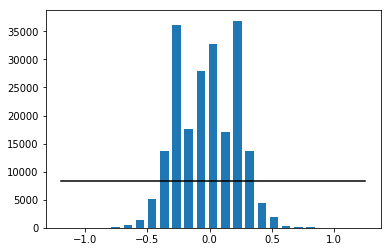

In [36]:
# Generate a histogram to see the distribution of steering angles
plt.figure()
n_bins = 25
avg_samples_per_bin = len(meas) / n_bins
hist, bins = np.histogram(meas, n_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(meas), np.max(meas)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()
plt.close()

In [37]:
# Because center bins are overrepresented, the model knows how to drive in a straight line 
# well but could be confused at corners

# Get the keep probability for each bin. Keep all that fall below the avg. Bring those above 
# the keep prob down to avg
keep_prob = []
target = avg_samples_per_bin * 0.7

for i in range(n_bins):
    if hist[i] < target:
        keep_prob.append(1.0)
    else:
        keep_prob.append(1.0 / (hist[i] / target))
        
remove_list = []

for i in range(len(meas)):
    for j in range(n_bins):
        if meas[i] > bins[j] and meas[i] <= bins[j+1]:
            if rand() > keep_prob[j]:
                remove_list.append(i)
                
print(len(keep_prob))
print(len(remove_list))

25
148837


In [38]:
# Generate a new dataset for the truncated histogram
samples_trunc = np.delete(samples, remove_list)
meas_trunc = np.delete(meas, remove_list)

print(len(samples))
print(len(meas))
print(len(samples_trunc))
print(len(meas_trunc))

209928
209928
61091
61091


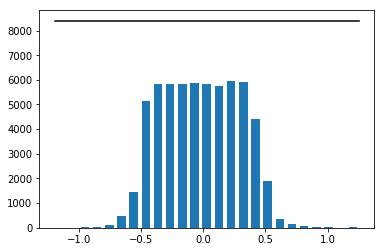

In [39]:
# Get a histogram of the new distribution
plt.figure()
hist, bins = np.histogram(meas_trunc, n_bins)
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(meas_trunc), np.max(meas_trunc)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()
plt.close()

In [40]:
from sklearn.utils import shuffle

# Shuffle the datasets in unison
samples, meas = shuffle(samples, meas)
samples_trunc, meas_trunc = shuffle(samples_trunc, meas_trunc)

# Test the output
print(samples[0:10])
print(meas[0:10])
print(samples_trunc[0:10])
print(meas_trunc[0:10])

['left_2017_06_04_14_44_49_420.jpg', 'right_2017_06_04_14_19_12_950.jpg', 'right_2017_06_04_15_01_33_898.jpg', 'right_2017_05_28_12_35_44_570.jpg', 'left_2017_05_28_11_23_22_269.jpg', 'center_2017_05_28_12_18_50_397.jpg', 'right_2017_05_28_12_40_59_263.jpg', 'right_2017_05_28_10_57_10_206.jpg', 'left_2017_05_29_11_02_00_902.jpg', 'center_2017_05_28_12_19_40_766.jpg']
[0.078550905, -0.24552102, -0.38109431, -0.25709292, 0.34539473, 0.069974743, -0.32508516, -0.27296758, 0.28603736, 0.1048079]
['left_2017_05_28_11_19_21_834.jpg' 'right_2017_05_28_12_19_04_889.jpg'
 'left_2017_05_29_10_37_23_521.jpg' 'left_2017_06_04_14_29_19_399.jpg'
 'left_2016_12_01_13_39_36_140.jpg' 'center_2017_05_28_11_08_42_361.jpg'
 'center_2016_12_01_13_37_19_208.jpg' 'left_2017_05_28_11_42_38_830.jpg'
 'center_2017_05_28_11_39_58_013.jpg' 'left_2016_12_01_13_33_29_493.jpg']
[ 0.1484669  -0.51760751  0.19209644  0.52257109  0.72320676 -0.08699484
  0.          0.25756285  0.03169055  0.3787396 ]


In [41]:
from sklearn.model_selection import train_test_split

# Separate the data into training and validation sets
# Note: samples=X_, meas=y_
X_train, X_valid, y_train, y_valid = train_test_split(samples, meas, test_size=0.20, random_state=42)
X_train_tr, X_valid_tr, y_train_tr, y_valid_tr = train_test_split(samples_trunc, meas_trunc, test_size=0.20, 
                                                                  random_state=42)

# Make sure we did that properly
print(X_train[0:5])
print(y_train[0:5])
print(X_valid[0:5])
print(y_valid[0:5])
print(X_train_tr[0:5])
print(y_train_tr[0:5])
print(X_valid_tr[0:5])
print(y_valid_tr[0:5])

['center_2017_05_28_12_08_06_049.jpg', 'right_2017_06_04_14_44_18_183.jpg', 'right_2017_06_04_14_14_28_646.jpg', 'center_2016_12_01_13_44_52_788.jpg', 'center_2017_05_28_11_26_12_757.jpg']
[0.318609, -0.39610261, -0.25301045, 0.0, -0.00878172]
['right_2016_12_01_13_45_34_876.jpg', 'center_2017_06_04_14_11_07_639.jpg', 'center_2017_06_04_14_51_58_848.jpg', 'left_2017_06_04_14_14_42_677.jpg', 'right_2017_05_28_12_25_15_755.jpg']
[-0.25, -0.061941959, 0.02970806, -0.079769701, -0.19330063]
['center_2017_05_29_10_30_46_294.jpg' 'center_2017_05_28_12_44_29_334.jpg'
 'left_2016_12_01_13_38_47_561.jpg' 'left_2017_05_29_10_40_48_435.jpg'
 'center_2017_06_04_14_30_39_151.jpg']
[-0.05527491  0.01235021  0.6275214   0.28752056  0.27271789]
['left_2017_05_29_10_59_14_944.jpg' 'right_2017_05_28_11_36_06_097.jpg'
 'right_2017_05_28_11_18_26_594.jpg' 'right_2017_06_04_14_19_18_369.jpg'
 'center_2017_05_28_10_51_35_562.jpg']
[ 0.29743305 -0.30492246 -0.36624771 -0.44592929 -0.07865366]


In [42]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout
from keras.regularizers import l2, activity_l2
from keras.optimizers import Adam

def nvidia_model(): 
    """
    NVIDIA model
    """
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(66, 200, 3)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="elu"))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="elu"))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="elu"))
    model.add(Convolution2D(64, 3, 3, border_mode="valid", W_regularizer=l2(0.001), activation="elu"))
    model.add(Convolution2D(64, 3, 3, border_mode="valid", W_regularizer=l2(0.001), activation="elu"))
    model.add(Flatten())
    model.add(Dense(100, W_regularizer=l2(0.001), activation="elu"))
    model.add(Dense(50, W_regularizer=l2(0.001), activation="elu"))
    model.add(Dense(10, W_regularizer=l2(0.001), activation="elu"))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=Adam(lr=1e-4))
    return model

Using TensorFlow backend.


In [43]:
import cv2
from numpy.random import randint, uniform

def process_img(image):
    """
    Preprocessing for an image
    
    :param image: The image to be processed
    :return img: The processed image
    """
    # Crop from 160x320x3 to 40x320x3
    img = image[50:140,:,:]
    
    # Apply a minor Gaussian blur
    img = cv2.GaussianBlur(img, (3,3), 0)
    
    # Scale to match NVIDIA input size 66x200x3
    img = cv2.resize(img, (200, 66), interpolation=cv2.INTER_AREA)
    
    # Convert to YUV color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img


def random_distort(img, angle):
    """
    Adds random distortion (brightness adjust, vertical horizon shift)
    
    :param img: The image
    :param angle: The steering angle
    :return: The distorted image, the angle
    """
    out_img = img.astype(float)
    
    # Random brightness adjust keeps values in range [0, 255]
    val = randint(-28, 28)
    if val > 0:
        mask = (out_img[:, :, 0] + val) > 255
    else:
        mask = (out_img[:, :, 0] + val) < 0
    out_img[:, :, 0] += np.where(mask, 0, val)
    
    # Random shadow
    h, w = out_img.shape[0:2]
    mid = randint(0, w)
    factor = uniform(0.6, 0.8)
    if rand() > 0.5:
        out_img[:, 0:mid, 0] *= factor
    else:
        out_img[:, mid:w, 0] *= factor
        
    # Random horizon shift
    h, w, _ = out_img.shape
    horizon = 2 * h / 5
    v_shift = randint(-h/8, h/8)
    pts1 = np.float32([[0, horizon], [w, horizon], [0, h], [w, h]])
    pts2 = np.float32([[0, horizon+v_shift], [w, horizon+v_shift], [0, h], [w, h]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    out_img = cv2.warpPerspective(out_img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    
    return (out_img.astype(np.uint8), angle)


def generator(samples, measurements, batch_size=32, validation_flag=False):
    """
    Generator to reduce memory footprint when training
    
    :param samples: The array of images to process
    :param measurements: The array of steering angle measurements
    :param batch_size: The number of samples to process concurrently
    :param validation_flag: Set to true when running test or validation sets. 
                            Applies random distortion when false
    :yield: The generator
    """
    assert len(samples) == len(measurements)
    num_samples = len(samples)
    
    # Shuffle the data
    samples, measurements = shuffle(samples, measurements)

    while 1: # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_meas = measurements[offset:offset+batch_size]

            images = []
            angles = []
            for i, sample_val in enumerate(batch_samples):
                image = cv2.imread(img_path + sample_val, cv2.IMREAD_COLOR)
                angle = batch_meas[i]
                
                # Preprocess the image
                image = process_img(image)
                
                # Apply random distortion
                if not validation_flag:
                    image, angle = random_distort(image, angle)    

                images.append(image)
                angles.append(angle)
                
                # If the steering angle is > 0.33, also flip the image and invert the angle
                image = cv2.flip(image, 1)
                images.append(image)
                angles.append(-angle)
                
            X_arr = np.array(images)
            y_arr = np.array(angles)
            yield shuffle(X_arr, y_arr)

In [48]:
def plot_results(history, num=0):
    """
    Plot the results 
    
    :param history: The fit model
    :param num: The number for the output file to save to
    """
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.savefig("training_validation_loss_plot_' + num + '.jpg")
    plt.show()
    plt.close()

In [49]:
def process_img_for_vis(img, angle, pred_angle, frame):
    """
    Formats an image for visualization
    
    :param img: The image
    :param angle: The steering angle
    :param pred_angle: The steering angle predicted by the model (if any)
    :param frame: The frame number
    :return: The processed image
    """
    # Convert color and resize
    img = cv2.cvtColor(img, cv2.COLOR_YUV2BGR)
    img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    
    # Plot text of the frame number and steering angle
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'frame: ' + str(frame), org=(2,18), fontFace=font, fontScale=0.5, color=(0, 0, 255), thickness=1)
    cv2.putText(img, 'angle: ' + str(angle), org=(2,34), fontFace=font, fontScale=0.5, color=(0, 0, 255), thickness=1)
    
    # Apply a line showing the steering angle and (if exists) the predicted angle
    h, w = img.shape[0:2]
    cv2.line(img, (int(w/2), int(h)), (int(w/2 + angle * w/4), int(h/2)), (0, 255, 0), thickness=4)
    if pred_angle != None:
        cv2.line(img, (int(w/2), int(h)), (int(w/2 + angle * w/4), int(h/2)), (255, 0, 0), thickness=4)
        
    return img
        
def gen_vis_data(img_paths, angles, batch_size=16, validation_flag=False):
    """
    Generates trining data for visualization
    
    :param img_paths: The image paths
    :param angles: The steering angles
    :param batch_size: The batch size
    :param validation_flag: Whether this is training or validation data
    :return: An array of X, array of y
    """
    X = []
    y = []
    
    img_paths, angles = shuffle(img_paths, angles)
    
    for i in range(batch_size):
        img = cv2.imread(img_path + img_paths[i])
        ang = angles[i]
        img = process_img(img)
        
        if not validation_flag:
            img, ang = random_distort(img, ang)
            
        X.append(img)
        y.append(ang)
        
    return (np.array(X), np.array(y))

In [50]:
# Visualize some of the data
X_vis, y_vis = gen_vis_data(samples, meas)
for i in range(len(X_vis)):
    img = process_img_for_vis(X_vis[i], y_vis[i], None, i)

    plt.figure()
    plt.imshow(img)
    plt.savefig('vis.png')
    plt.close()

Epoch 1/50
29184/29442 [============================>.] - ETA: 1s - loss: 0.5042  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


29696/29442 [==============================] - 247s - loss: 0.5040 - val_loss: 0.4826
Epoch 2/50
29696/29442 [==============================] - 245s - loss: 0.4688 - val_loss: 0.4527

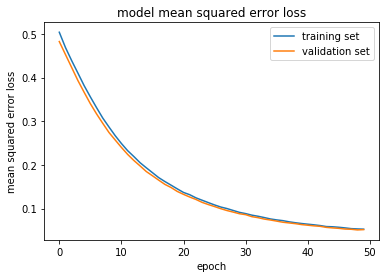

In [80]:
# Compile and train the model using the generator
batch_size = 128

def train_model(num_epochs=30, truncated=False, batch_size=128, num=0, samples_per_epoch=29696):

    if not truncated:
        train_generator = generator(X_train, y_train, batch_size, False)
        valid_generator = generator(X_valid, y_valid, batch_size, True)
        nb_val_samples = len(X_valid)
    else:
        train_generator = generator(X_train_tr, y_train_tr, batch_size, False)
        valid_generator = generator(X_valid_tr, y_valid_tr, batch_size, True)
        nb_val_samples = len(X_valid_tr)

    model = nvidia_model()
    model.save('model.h' + num)

    fit_model = model.fit_generator(train_generator,
                                    samples_per_epoch=samples_per_epoch,
                                    validation_data=valid_generator,
                                    nb_val_samples=nb_val_samples,
                                    nb_epoch=num_epochs,
                                    verbose=1)

    print('Summary for model ' + num + ':')
    print(model.summary())

    plot_results(fit_model, num)

# Model 0
train_model(num_epochs=100, num=0)

# Model 1
train_model(num_epochs=100, truncated=True, num=1)

# Model 2
train_model(num_epochs=100, truncated=False, num=2, samples_per_epoch=59392)

# Model 3